In [76]:
# Turn on multi-threading on your computer for faster calculation 
%env OMP_NUM_THREADS = 10

env: OMP_NUM_THREADS=10


In [77]:
# import os
# cwd = os.getcwd()
# print(cwd)

In [78]:
# !pip install chart_studio

In [79]:
# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
import copy
import math

# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
from pandas import Series
from numpy.random import randn
import statsmodels.api as sm
import random
from scipy import stats

# importing libraries for data visualisations
import seaborn as sns
import matplotlib as mp
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None

# Standard plotly imports
# import chart_studio.plotly as chpy
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

# sklearn modules for preprocessing
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_squared_error

In [80]:
# path = "C:\\Users\\divya\\Documents\\QUEEN'S SMITH MMA\\Predictive Modelling - MMA 867\Assignment 867\\"

master = pd.read_csv('Master - Copy.csv')
train_def = pd.read_csv('Train.csv')
predict = pd.read_csv('Predict.csv')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# print(df.shape)
# df.head() # show the "head" -- first 5 rows of the data; note, these are rows 0...4

In [81]:
# df = pd.concat([train, pred])

In [82]:
master.info() # Checking what kinds of data we have 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [83]:
master.shape

(1470, 39)

In [84]:
master.describe() # Count=1470 for all, hence no missing value

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction,FrequencyOfJobChange
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,8.162585,4.891999
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,1.884721,5.315192
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,7.000000,1.111111
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,8.000000,3.183333
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,10.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,12.000000,40.000000


In [85]:
master.isna().sum()    # check for missing values for surity

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [86]:
master.columns.to_series().groupby(master.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalSatisfaction'], float64: ['FrequencyOfJobChange'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'PromotedInCurrentRole', 'RoleChangeWithinCompany']}

In [87]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
master["Attrition"] = master["Attrition"].apply(lambda x: target_map[x])

In [88]:
# master.hist(figsize=(20,20))
# plt.show()

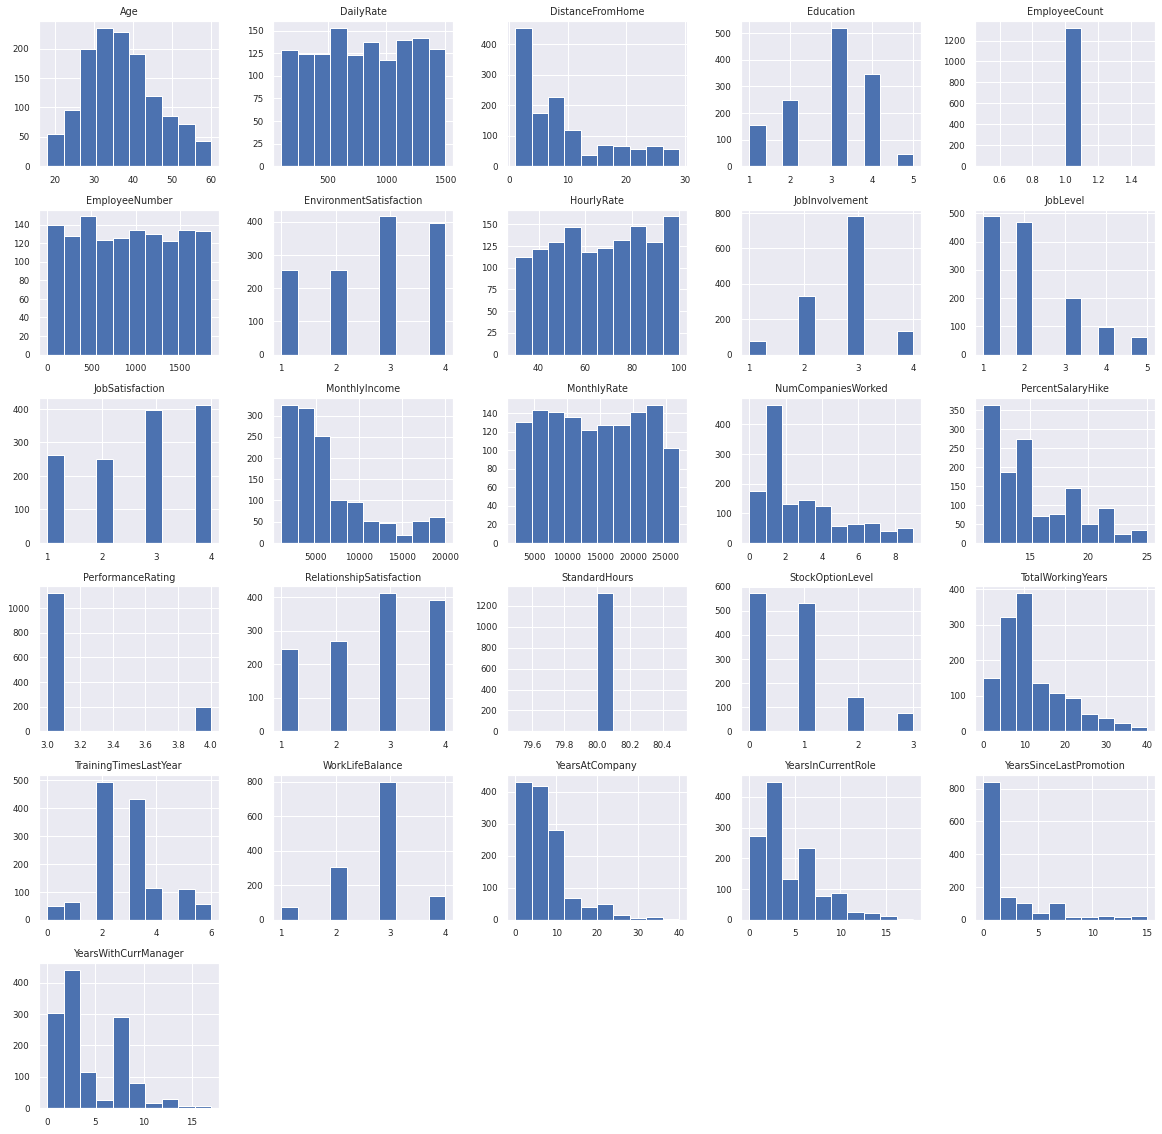

In [89]:
train_def.hist(figsize=(20,20))
plt.show()

In [90]:
corr = master.corr()
corr['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
FrequencyOfJobChange       -0.117341
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
TotalSatisfaction          -0.146819
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
E

[Text(0.5, 1.0, 'Heatmap of Highly correlated values')]

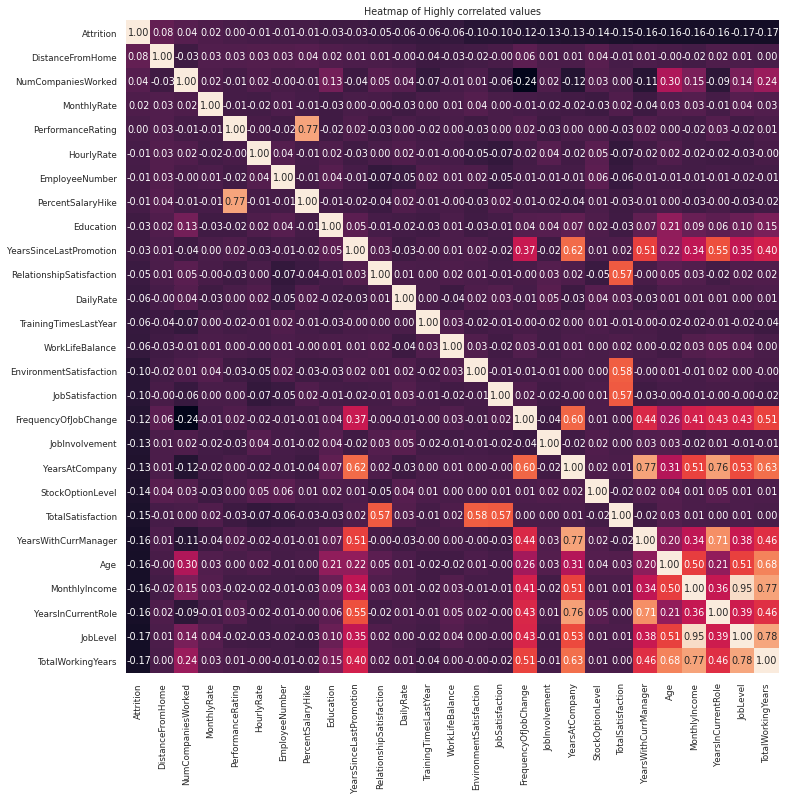

In [91]:
# Heatmap for first n numerical features that correlate with target the most 
n = 50
plt.figure(figsize = (35,12))
sns.set(font_scale=0.8)
sns.heatmap(master[corr.nlargest(n, 'Attrition').index].corr(), 
            annot = True, 
            fmt = '.02f', 
            square = True, 
            cbar = False,).set(title = "Heatmap of Highly correlated values")

In [92]:
#Checking unique values in each column

for col in list(master):
    print(col)
    print(master[col].unique())

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition
[1 0]
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1

In [93]:
 #Moving Employee Number to 1st column
master = master[['EmployeeNumber'] + [ col for col in master.columns if col != 'EmployeeNumber']]
master.head()

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction,FrequencyOfJobChange,PromotedInCurrentRole,RoleChangeWithinCompany
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,7,1.000000,Y,Y
1,2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,9,10.000000,Y,Y
2,4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,9,1.166667,N,N
3,5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,10,8.000000,Y,Y
4,7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,7,0.666667,N,N


In [94]:
## Creating a Function to Distribute the Age
def func(x):
    if(x >=18 and x<30 ):
        return 1
    elif(x>=30 and x<40):
        return 2
    elif(x>=40 and x<50):
        return 3
    elif(x>=50 and x<60):
        return 4
    elif(x>=60 and x<=80):
        return 5
    
master['Age'] = master['Age'].apply(func)
# master

In [95]:
## Creating a Function to Distribute the Years at company
def func(x):
    if(x<6 ): #Upto 5 Years
        return 1
    elif(x>=6 and x<11): #6 to 10 Years
        return 2
    elif(x>=11 and x<21): #11 to 20 Years
        return 3
    elif(x>=21): #more than 20 Years
        return 4
    
master['YearsAtCompany'] = master['YearsAtCompany'].apply(func)

In [96]:
master['Attrition'] = master['Attrition'].astype('category')
master['Age'] = master['Age'].astype('category')
master['Education'] = master['Education'].astype('category')
master['EnvironmentSatisfaction'] = master['EnvironmentSatisfaction'].astype('category')
master['JobInvolvement'] = master['JobInvolvement'].astype('category')
master['JobLevel'] = master['JobLevel'].astype('category')
master['JobSatisfaction'] = master['JobSatisfaction'].astype('category')
master['PerformanceRating'] = master['PerformanceRating'].astype('category')
master['RelationshipSatisfaction'] = master['RelationshipSatisfaction'].astype('category')
master['StockOptionLevel'] = master['StockOptionLevel'].astype('category')
master['WorkLifeBalance'] = master['WorkLifeBalance'].astype('category')
master['YearsAtCompany'] = master['YearsAtCompany'].astype('category')
master['PromotedInCurrentRole'] = master['PromotedInCurrentRole'].astype('category')
master['RoleChangeWithinCompany'] = master['RoleChangeWithinCompany'].astype('category')
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            1470 non-null   int64   
 1   Age                       1470 non-null   category
 2   Attrition                 1470 non-null   category
 3   BusinessTravel            1470 non-null   object  
 4   DailyRate                 1470 non-null   int64   
 5   Department                1470 non-null   object  
 6   DistanceFromHome          1470 non-null   int64   
 7   Education                 1470 non-null   category
 8   EducationField            1470 non-null   object  
 9   EmployeeCount             1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   category
 11  Gender                    1470 non-null   object  
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   catego

In [ ]:
# # Create a label encoder object
# le = LabelEncoder()
# # Label Encoding will be used for columns with 2 or less unique values
# for col in master.columns[1:]:
#     if master[col].dtype == 'object':
#         if len(list(master[col].unique())) <= 2:
#             le.fit(master[col])
#             master[col] = le.transform(master[col])
        

In [ ]:
Attrition = master['Attrition']
df = copy.deepcopy(master).drop(['Attrition', 'EmployeeCount', 'Over18', 'StandardHours' ], axis=1)
df.shape

(1470, 35)

In [ ]:
# creating dummy variables for non-numbers ("one hot encoding")
df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','float64']).columns)
df.head()   

,EmployeeNumber,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction,FrequencyOfJobChange,Age_1,Age_2,Age_3,Age_4,Age_5,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,YearsAtCompany_1,YearsAtCompany_2,YearsAtCompany_3,YearsAtCompany_4,PromotedInCurrentRole_N,PromotedInCurrentRole_Y,RoleChangeWithinCompany_N,RoleChangeWithinCompany_Y
0,1,1102,1,94,5993,19479,8,11,8,0,4,0,5,7,1.000000,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,2,279,8,61,5130,24907,1,23,10,3,7,1,7,9,10.000000,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1
2,4,1373,2,92,2090,2396,6,15,7,3,0,0,0,9,1.166667,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
3,5,1392,3,56,2909,23159,1,11,8,3,7,3,0,10,8.000000,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
4,7,591,2,40,3468,16632,9,12,6,3,2,2,2,7,0.666667,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0


In [ ]:
df.shape

(1470, 92)

In [ ]:
df['Attrition'] = Attrition

In [ ]:
df.shape

(1470, 93)

In [ ]:
ID = train_def['EmployeeNumber']

In [ ]:
# splitting train and test data
train = df.iloc[:len(ID), :].reset_index(drop=True)
pred = df.iloc[len(train):, :].reset_index(drop=True)

In [ ]:
print(train.shape)
print(pred.shape)

(1320, 93)
(150, 93)


In [ ]:
y = train['Attrition']
X = train.drop(['Attrition', 'EmployeeNumber'], axis = 1)

In [ ]:
X.shape

(1320, 91)

In [ ]:
# For "apples-to-apples" comparisons, set a starting value ("seed") for the random number generator
np.random.seed(77300)

# split the data randomly into 80% train and 20% test samples 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 120, stratify=y)
# IMPORTANT: these samples are stratified, i.e., the proportion of retained and not-retained customers is the same in both

# Lets check the results
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200, 91)
(120, 91)
(1200,)
(120,)


In [ ]:
y_test.head()

665     0
74      0
1127    0
934     0
97      0
Name: Attrition, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
# First we define a set of functions to compute the metrics of the model

# ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

In [ ]:
# Select the threshold value -- we will use Т=0.160135. Why? Why not 50%? Because 16% -- is the average probability of churn in our data (237 "1"s out of 1480 datapoints) 
class_threshold = 0.28

# Model №1: Logistic regression

In [ ]:
# define the model and call it classifier_LR
classifier_LR = LogisticRegression(solver='liblinear')

# train classifier_LR on the training data
classifier_LR.fit(X_train, y_train)

# This is a regression, so it has coefficients -- lets see them
# Note, there is no easy way to show significance, etc. with sklearn
print('Intercept: ' + str(classifier_LR.intercept_))
print('Coefficients (10 largest and 10 smallest') 
summary = pd.DataFrame([X_test.columns,classifier_LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
top10positive = summary.head(10) # 10 largest (by value)
top10negative = summary.tail(10) # 10 smallest (by value)
top10list=pd.DataFrame()
top10list= top10list.append(pd.DataFrame(data = top10positive))
top10list= top10list.append(pd.DataFrame(data = top10negative))
top10list

Intercept: [0.07266458]
Coefficients (10 largest and 10 smallest


,Variable,Coefficient
68,OverTime_Yes,0.732007
75,StockOptionLevel_0,0.4782
66,MaritalStatus_Single,0.319847
46,JobLevel_1,0.311585
20,BusinessTravel_Travel_Frequently,0.291234
14,Age_1,0.284072
24,Department_Sales,0.246579
42,JobInvolvement_1,0.243711
10,YearsSinceLastPromotion,0.229918
36,EnvironmentSatisfaction_1,0.218621


In [ ]:
# Use the trained model to predict testing data

y_pred_prob = classifier_LR.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # applying the threshold rule to classify

print(y_pred_prob[0:5]) # first 5 probabilities 
print(y_pred[0:5]) # resultant predicted classification 
print(y_test[0:5]) # actual outcomes


[0.51640284 0.13868888 0.08489172 0.25404558 0.10480521]
[1 0 0 0 0]
665     0
74      0
1127    0
934     0
97      0
Name: Attrition, dtype: category
Categories (2, int64): [0, 1]


Metrics of the logistic regression model: 

Confusion matrix: 
[[83 17]
 [ 4 16]]
                                   Accuracy: 0.825
                   SENSITIVITY (aka RECALL): 0.8
                 SPECIFICITY (aka FALL-OUT): 0.83
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.48484848484848486
                 NEGATIVE PREDICTIVE VALUE): 0.9540229885057471


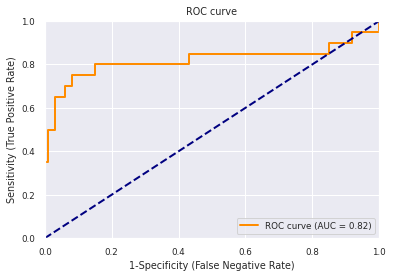

 AUC: 0.8195


In [ ]:
# Lets look at the model metrics 
print('Metrics of the logistic regression model: \n')

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


In [ ]:
# Apply variable selection with Stepwise Recursive Feature Selection 

from sklearn.feature_selection import RFE

rfe = RFE(estimator=classifier_LR, n_features_to_select=93, step=1) # in this example we will select 20 variables; this number "20" is a hyperparameter to tune
rfe.fit(X_train, y_train)
ranking = rfe.ranking_.reshape(len(X_train.columns))

# which 85 variables are in the model?
pd.DataFrame([X_test.columns,ranking]).transpose().sort_values(1).head(50)


,0,1
0,DailyRate,1
65,MaritalStatus_Married,1
64,MaritalStatus_Divorced,1
63,JobSatisfaction_4,1
62,JobSatisfaction_3,1
61,JobSatisfaction_2,1
60,JobSatisfaction_1,1
59,JobRole_Sales Representative,1
58,JobRole_Sales Executive,1
57,JobRole_Research Scientist,1


Metrics of the logistic regression model after variable selection: 

Confusion matrix: 
[[83 17]
 [ 4 16]]
                                   Accuracy: 0.825
                   SENSITIVITY (aka RECALL): 0.8
                 SPECIFICITY (aka FALL-OUT): 0.83
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.48484848484848486
                 NEGATIVE PREDICTIVE VALUE): 0.9540229885057471


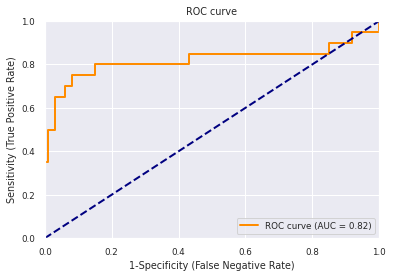

 AUC: 0.8195


In [ ]:
# Train the model and call it classifier_LR_RFE 
classifier_LR_RFE = rfe.fit(X_train, y_train)

# Use the trained model to predict testing data
y_pred_prob = classifier_LR_RFE.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification


# Lets look at the model metrics after variable selection 
print('Metrics of the logistic regression model after variable selection: \n')

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


# Method №2: Classification and Regression Tree, CART (aka "decision tree")

In [ ]:
# Define a CART model and call it classifier_DT
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 10, random_state=77300) # random_state -- is same as random seed, neede to get the same result every time we rerun

# Train the model classifier_DT on the training data
classifier_DT.fit(X_train, y_train)

#  Use the trained model to predict testing data
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1] # probabilities 
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print(y_pred_prob[0:5]) # first 5 probabilities 
print(y_pred[0:5]) # resultant predicted classification 
print(y_test[0:5]) # actual outcomes

# WOW -- the CART model made no mistakes on the first 5 customers! 


[0.76923077 0.66666667 0.08134642 0.08134642 0.08134642]
[1 1 0 0 0]
665     0
74      0
1127    0
934     0
97      0
Name: Attrition, dtype: category
Categories (2, int64): [0, 1]


CART tree with 10 leafs


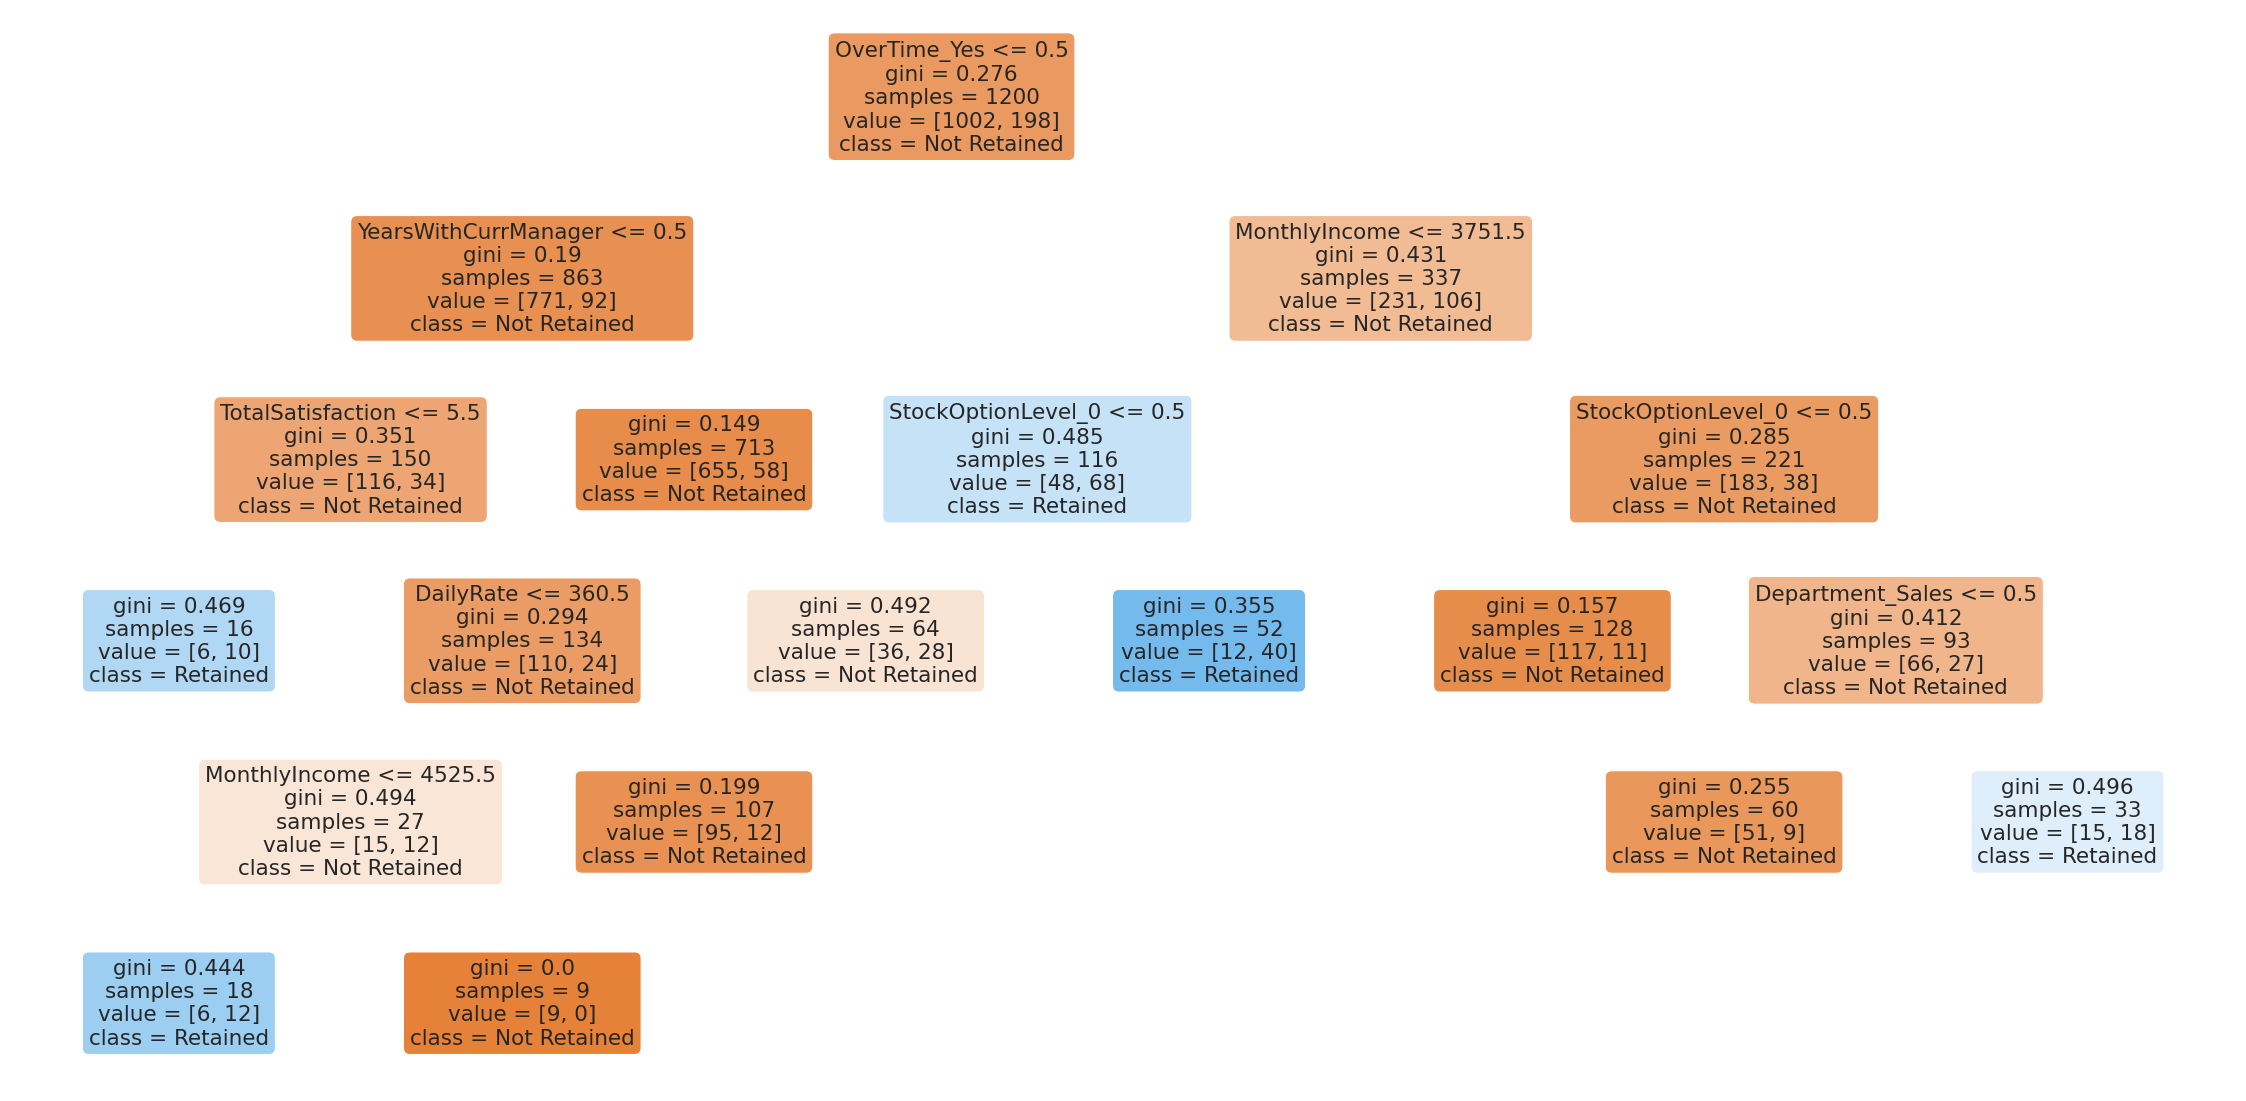

In [ ]:
# Visualizing the resultant tree

from sklearn import tree

plt.figure(figsize=(40,20))
tree.plot_tree(classifier_DT.fit(X_train, y_train), feature_names = X_train.columns, filled = True, 
               class_names = ['Not Retained', 'Retained'], rounded = True)
print('CART tree with 10 leafs')


Metrics of the CART model: 

Confusion matrix: 
[[83 17]
 [11  9]]
                                   Accuracy: 0.7666666666666667
                   SENSITIVITY (aka RECALL): 0.45
                 SPECIFICITY (aka FALL-OUT): 0.83
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.34615384615384615
                 NEGATIVE PREDICTIVE VALUE): 0.8829787234042553


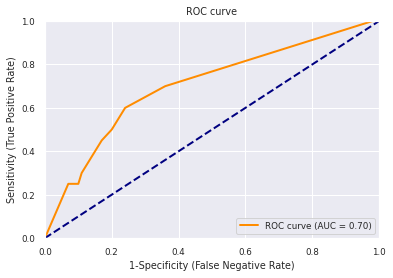

 AUC: 0.70275


In [ ]:
# Lets look at the model metrics

print('Metrics of the CART model: \n')

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

In [ ]:
# Hyper-parameter tuning. A CART model has multiple hyper-parameters, for instance:
# -- max number of leaves on a tree, 
# -- min number of datapoints at a leaf
# -- min number of datapoints to create a split
# and so on

DecisionTreeClassifier() # display what those hyper-parameters are and their default values

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

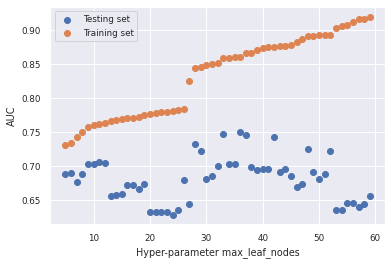

In [ ]:
# Tuning hyper-parameter max_leaf_nodes

n_max_leaf_nodes = range(5,60) # Lets train the models with 5, 6, 7, ... 60 leafs

# for each model calculate AUC for testing 
array = []
for n in n_max_leaf_nodes:
    
    classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
    classifier_DT = classifier_DT.fit(X_train, y_train)
    
    y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]   
    y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

    array.append([n,roc_auc_score(y_test, y_pred_prob)])

# plot the testing set AUCs
array = pd.DataFrame(array)
plt.scatter(array[0],array[1])

# now for each model calculate AUC on training 
array = []
for n in n_max_leaf_nodes:

    classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
    classifier_DT = classifier_DT.fit(X_train, y_train)
    
    y_pred_prob = classifier_DT.predict_proba(X_train)[:,1] 
    y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

    array.append([n,roc_auc_score(y_train, y_pred_prob)])

# plot the training set AUCs
array = pd.DataFrame(array)
plt.scatter(array[0],array[1])

# label the axes on the plot
plt.xlabel('Hyper-parameter max_leaf_nodes')
plt.ylabel('AUC')

# add the legend
plt.legend(['Testing set','Training set'])


In [ ]:
# lets train the model with 8 leafs
classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 8)
classifier_DT = classifier_DT.fit(X_train, y_train)

# obtain its predictions
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]   
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

# calclate and print the AUC
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

 AUC: 0.68875


# Method №3: Random Forest

In [ ]:
# Define a random forest model and call it classifier_RF
classifier_RF = RandomForestClassifier(random_state=77300) # recall what random_state mean

# Train the model classifier_RF on the training data
classifier_RF.fit(X_train, y_train)

# A random forest model has many hyper-parameters, for example::
# -- the number of trees in the forest ensemble, 
# -- voting rules, 
# -- max number of leafs on each tree, 
# -- min number of datapoints at a leaf
# and so on

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=77300,
                       verbose=0, warm_start=False)

Metrics of the Random Forest model: 

Confusion matrix: 
[[85 15]
 [ 6 14]]
                                   Accuracy: 0.825
                   SENSITIVITY (aka RECALL): 0.7
                 SPECIFICITY (aka FALL-OUT): 0.85
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.4827586206896552
                 NEGATIVE PREDICTIVE VALUE): 0.9340659340659341


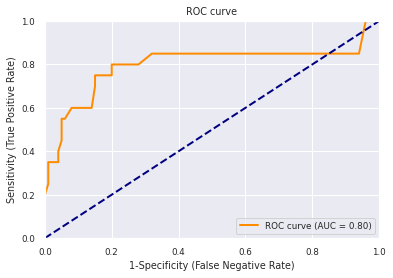

 AUC: 0.7965


In [ ]:
# Use the trained model to predict testing data
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1] # probabilities 
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Random Forest model: \n')

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


Optimized hyper-parameters:{'n_estimators': 200}
Metrics of the Random Forest model with the optimized hyper-parameter for the "number of trees": 

Confusion matrix: 
[[84 16]
 [ 6 14]]
                                   Accuracy: 0.8166666666666667
                   SENSITIVITY (aka RECALL): 0.7
                 SPECIFICITY (aka FALL-OUT): 0.84
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.4666666666666667
                 NEGATIVE PREDICTIVE VALUE): 0.9333333333333333


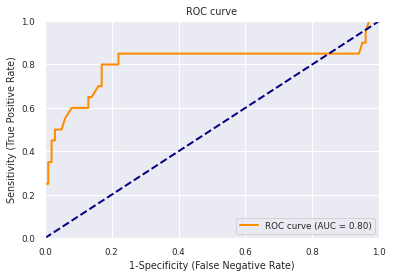

 AUC: 0.8037500000000001


In [ ]:
# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)

n_trees = [10, 50, 100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 800, 900, 1000] # as an example, we will tune the "numeber of trees" hyper-parameter (n_trees) and we will consider values of 100, 200, ... 600 trees in the forest
Grid_srch_parameters_list = [ [{'n_estimators':n_trees}] ] 

# we will apply a 5-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_RF, cv = 10, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True) 

# apply function grid_search to the training data, call the resultand best model grid_search_RF
grid_search_RF = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data
y_pred_prob = grid_search_RF.predict_proba(X_test)[:,1] # probabilities  
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))
    
# Lets look at the model metrics

print('Metrics of the Random Forest model with the optimized hyper-parameter for the "number of trees": \n')

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


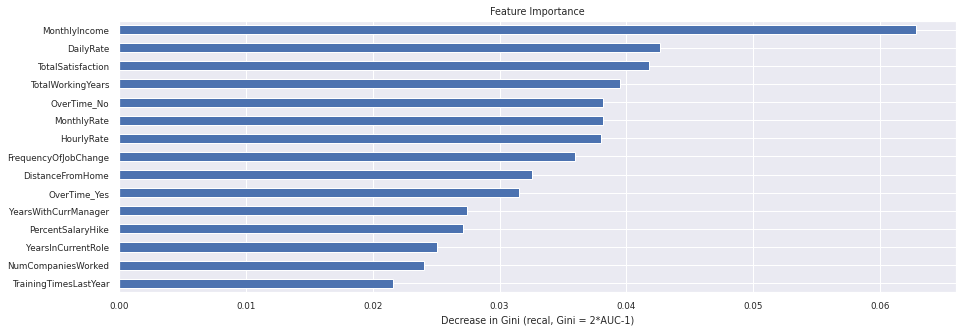

In [ ]:

# Tree models do not have coefficients, but have easily-interpretable tree plots
# But in tree ensembles (such as random forect) there is no point to look at individual trees

# Useful intuition, however, can be obtained from the Feature Importance Plots

# calculate feature importances
importances = grid_search_RF.best_estimator_.feature_importances_ 

# plot them
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
feature_importances = pd.Series(classifier_RF.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh', align='center')

# Method №4: Gradient Boosting Machine

In [ ]:
# Define the gradient boosting machine model and call it classifier_GBM
classifier_GBM = GradientBoostingClassifier(random_state=77300)

# Train the model classifier_GBM on the training data
classifier_GBM.fit(X_train, y_train)

# A gradient boosting model has many hyper-parameters, for example::
# -- the number of trees in the forest ensemble, 
# -- speed of boosting ("learning rate", "decay rate"), 
# -- max number of leafs on each tree, 
# -- min number of datapoints at a leaf
# and so on


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=77300, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# Use the trained model to predict testing data
y_pred_prob = classifier_GBM.predict_proba(X_test)[:,1] # probabilities 
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model: \n')

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

In [54]:
# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)

# as an example, we will tune two parameters
n_trees = [100, 200, 300, 400, 500, 600] # first, the "numeber of trees" hyper-parameter (n_trees) and we will consider values of 100, 200, ... 600 trees in the forest
learning_rates = [0.01, 0.05, 0.1, 0.5, 0.8] # second, speed of boosting ("learning rate") and we will use two values 0.01 и 0.1

Grid_srch_parameters_list = [ [{'n_estimators':n_trees, 'learning_rate': learning_rates}] ] 

# we will apply a 5-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_GBM, cv = 5, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True) 

# # apply function grid_search to the training data, call the resultant best model grid_search_GBM
grid_search_GBM = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data 
y_pred_prob = grid_search_GBM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model with the optimized hyper-parameters": \n')

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


KeyboardInterrupt: ignored

# Method №5: Support Vector Machines

In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # scale the data
svm_estimators.append(('svm', svm.SVC(probability=True))) # define SVM with probabilities (recall, SVM be default does not predict probabilities)
     
# Define the support vectors machine model and call it classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Train the model classifier_SVM on the training data
Classifier_SVM.fit(X_train, y_train)

In [ ]:
# use the fitted model to predict the testing data 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Support Vector Machines model: \n')

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

# Method №6: Artificial Neural Networks ("Deep Learning") with Tensor Flow

In [ ]:
# !pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [ ]:
# Define the architecture and optimization metrics for the network
def create_model():
    model = keras.Sequential([
        layers.Dense(128,  activation="relu", name="hidden-dense-128-layer-1"),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu", name="hidden-dense-64-layer-2"),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid', name="output-layer"),
    ])
    adam = tf.keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

nn_estimators = []
nn_estimators.append(('standardize', StandardScaler())) #scale the data
nn_estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=30, batch_size=128, validation_split=0.2))) # compile the model

# Define the TensorFlow Neural Network model and call it classifier_TF_NN
Classifier_TF_NN = Pipeline(nn_estimators, verbose=False)

# Train the model classifier_SVM on the training data
Classifier_TF_NN.fit(X_train, y_train)

In [ ]:
# use the fitted model to predict the testing data 
y_pred_prob = Classifier_TF_NN.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Tensor Flow Neural Network model: \n')

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

# Prediction

In [ ]:
pred.shape

In [ ]:
pred_ID = pred['EmployeeNumber']
pred_churn = pred['Attrition']
X_pred = pred.drop(columns=['Attrition', 'EmployeeNumber'], axis = 1).copy()

In [ ]:
# Since the Logistic Regression model with optimized hyper-parameters obtained the higest AUC, lets take that
y_pred_prob_LR = classifier_LR_RFE.predict_proba(X_pred)[:,1] # probabilities
y_pred_LR = np.where(y_pred_prob_LR > class_threshold, 1, 0) # classification 
# CART
y_pred_prob_CART = classifier_DT.predict_proba(X_pred)[:,1] # probabilities
y_pred_CART = np.where(y_pred_prob_CART > class_threshold, 1, 0) # classification 
# RF
y_pred_prob_RF = classifier_RF.predict_proba(X_pred)[:,1] # probabilities
y_pred_RF = np.where(y_pred_prob_RF > class_threshold, 1, 0) # classification 
# GBM
y_pred_prob_GBM = classifier_GBM.predict_proba(X_pred)[:,1] # probabilities
y_pred_GBM = np.where(y_pred_prob_GBM > class_threshold, 1, 0) # classification 
# SVM
y_pred_prob_SVM = Classifier_SVM.predict_proba(X_pred)[:,1] # probabilities
y_pred_SVM = np.where(y_pred_prob_SVM > class_threshold, 1, 0) # classification 
# TF
y_pred_prob_TF = Classifier_TF_NN.predict_proba(X_pred)[:,1] # probabilities
y_pred_TF = np.where(y_pred_prob_TF > class_threshold, 1, 0) # classification




In [ ]:
# Lets add the ID column to know "who is who"
Prediction = pd.DataFrame(data={"EmployeeNumber": pred_ID,"Probablity of Churn LR":y_pred_prob_LR, "Churn_LR":y_pred_LR,
                                "Probablity of Churn CART":y_pred_prob_CART, "Churn_CART":y_pred_CART,
                                "Probablity of Churn RF":y_pred_prob_RF, "Churn_RF":y_pred_RF,
                                "Probablity of Churn GBM":y_pred_prob_GBM, "Churn_GBM":y_pred_GBM,
                                "Probablity of Churn SVM":y_pred_prob_SVM, "Churn_SVM":y_pred_SVM,
                                "Probablity of Churn TF":y_pred_prob_TF, "Churn_TF":y_pred_TF,
                                "Actual Churn":pred_churn})

In [ ]:
pred_map = {1:'Yes', 0:'No'}
# Use the pandas apply method to numerically encode our attrition target variable
Prediction["Churn_LR"] = Prediction["Churn_LR"].apply(lambda x: pred_map[x])
Prediction["Churn_CART"] = Prediction["Churn_CART"].apply(lambda x: pred_map[x])
Prediction["Churn_RF"] = Prediction["Churn_RF"].apply(lambda x: pred_map[x])
Prediction["Churn_GBM"] = Prediction["Churn_GBM"].apply(lambda x: pred_map[x])
Prediction["Churn_SVM"] = Prediction["Churn_SVM"].apply(lambda x: pred_map[x])
Prediction["Churn_TF"] = Prediction["Churn_TF"].apply(lambda x: pred_map[x])
Prediction["Actual Churn"] = Prediction["Actual Churn"].apply(lambda x: pred_map[x])

In [ ]:
# Export the predictions into a CSV file
Prediction.to_csv("Predicted Churn All Models Threshold 28.csv",sep = ',')